# NBA Shot Quality Prediction

## Data Processing

### Data Loading

In [1]:
import pandas as pd

df = pd.read_csv('shot_logs.csv')

df = df.dropna()

df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,4,2,5:05,15.3,2,...,8.9,2,made,"Sullinger, Jared",203096,5.7,1,2,jarrett jack,101127
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127


### Data Preprocessing

In [2]:
# Converting the game clock to seconds remaining in the quarter
df['GAME_CLOCK'] = df['GAME_CLOCK'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,69,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,707,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,634,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,495,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,4,2,305,15.3,2,...,8.9,2,made,"Sullinger, Jared",203096,5.7,1,2,jarrett jack,101127
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,112,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,688,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,670,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127


In [3]:
# Encoding the categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,1282,0,1,24,1,1,69,10.8,2,...,7.7,2,0,14,101187,1.3,1,2,35,203148
1,21400899,1282,0,1,24,2,1,14,3.4,0,...,28.2,3,1,50,202711,6.1,0,0,35,203148
3,21400899,1282,0,1,24,4,2,707,10.3,2,...,17.2,2,1,61,203900,3.4,0,0,35,203148
4,21400899,1282,0,1,24,5,2,634,10.9,2,...,3.7,2,1,470,201152,1.1,0,0,35,203148
5,21400899,1282,0,1,24,6,2,495,9.1,2,...,18.4,2,1,455,101114,2.6,0,0,35,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,21400006,1747,0,0,-16,4,2,305,15.3,2,...,8.9,2,0,411,203096,5.7,1,2,112,101127
128064,21400006,1747,0,0,-16,5,3,112,18.3,5,...,8.7,2,1,395,203935,0.8,0,0,112,101127
128065,21400006,1747,0,0,-16,6,4,688,19.8,4,...,0.6,2,0,430,202323,0.6,1,2,112,101127
128066,21400006,1747,0,0,-16,7,4,670,23.0,2,...,16.9,2,0,425,201977,4.2,1,2,112,101127


In [4]:
# Drop the unnecessary or the columns which directly leak the answer
df = df.drop(columns=['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FGM', 'PTS', 'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSEST_DEFENDER', 'player_name', 'player_id'])

df

,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,69,10.8,2,1.9,7.7,2,0,1.3
1,14,3.4,0,0.8,28.2,3,1,6.1
3,707,10.3,2,1.9,17.2,2,1,3.4
4,634,10.9,2,2.7,3.7,2,1,1.1
5,495,9.1,2,4.4,18.4,2,1,2.6
...,...,...,...,...,...,...,...,...
128063,305,15.3,2,1.6,8.9,2,0,5.7
128064,112,18.3,5,6.2,8.7,2,1,0.8
128065,688,19.8,4,5.2,0.6,2,0,0.6
128066,670,23.0,2,4.2,16.9,2,0,4.2


In [5]:
# Data splitting
from sklearn.model_selection import train_test_split

y = df['SHOT_RESULT']
X = df.drop(columns=['SHOT_RESULT'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

### Logistic Regression

In [6]:
# Training a Logistic Regression Model for predicting shot success
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6035672013387209
              precision    recall  f1-score   support

           0       0.57      0.48      0.52     11062
           1       0.62      0.71      0.66     13439

    accuracy                           0.60     24501
   macro avg       0.60      0.59      0.59     24501
weighted avg       0.60      0.60      0.60     24501



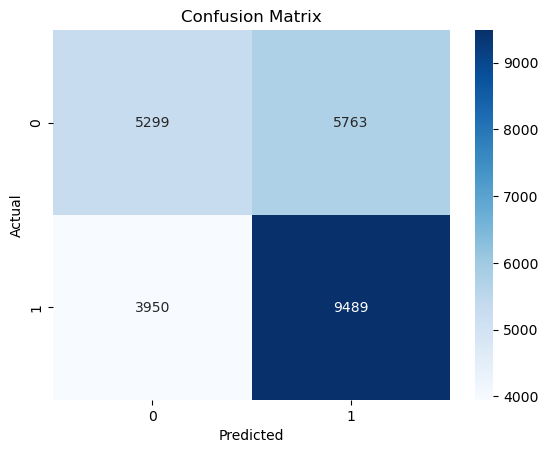

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.6208522161293194


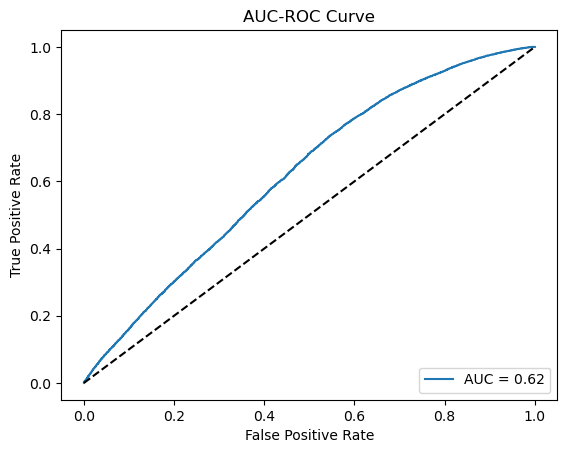

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print("AUC:", auc)

plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [10]:
# Training a Random Forest Model for predicting shot success
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5872413370882821
              precision    recall  f1-score   support

           0       0.55      0.43      0.49     11062
           1       0.60      0.71      0.65     13439

    accuracy                           0.59     24501
   macro avg       0.58      0.57      0.57     24501
weighted avg       0.58      0.59      0.58     24501



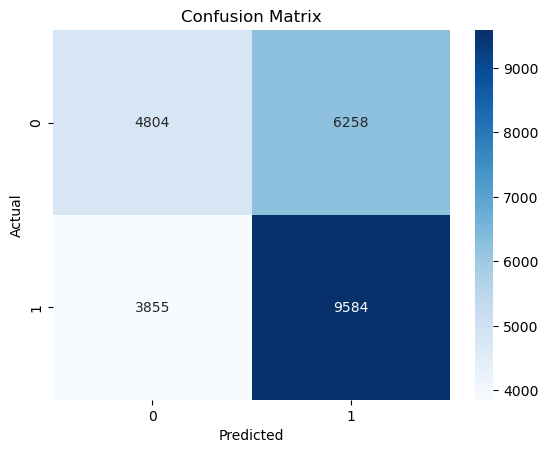

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.6208522161293194


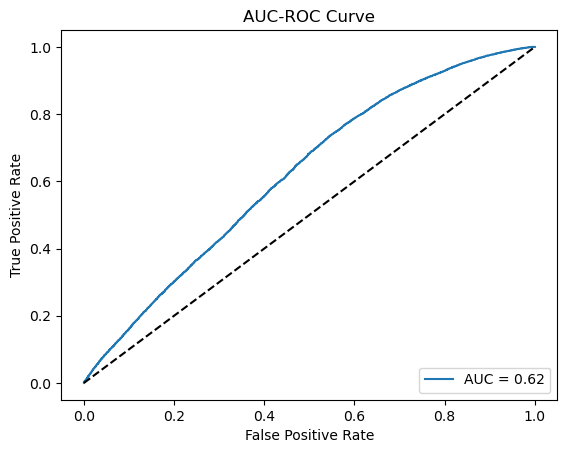

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print("AUC:", auc)

plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Neural Network

In [14]:
# Training a basic neural network for predicting shot success
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [15]:
y_pred = nn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6177707032366025
              precision    recall  f1-score   support

           0       0.66      0.32      0.43     11062
           1       0.61      0.86      0.71     13439

    accuracy                           0.62     24501
   macro avg       0.63      0.59      0.57     24501
weighted avg       0.63      0.62      0.59     24501



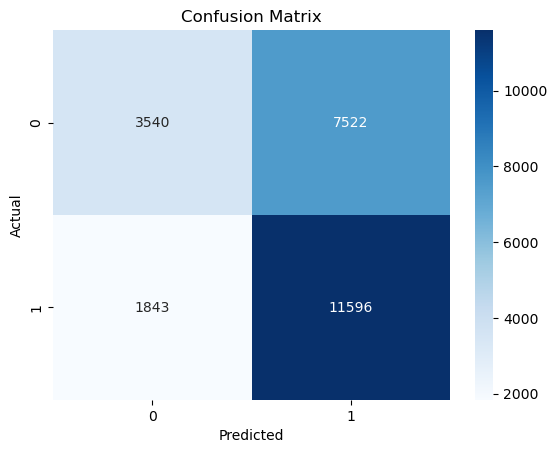

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.6208522161293194


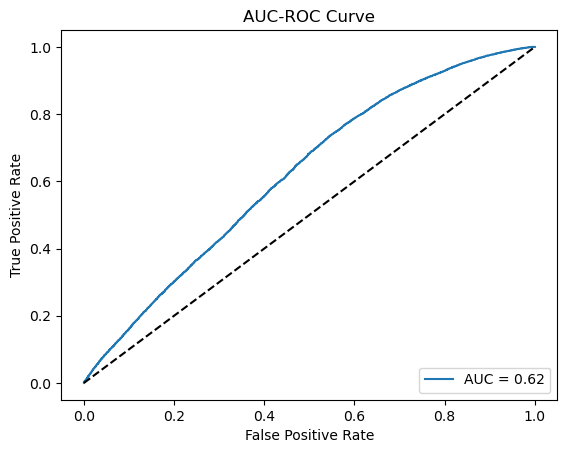

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print("AUC:", auc)

plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Expected Point Prediction

### Logistic Regression

In [18]:
# predict the probability of a shot being made for the test set
y_prob = lr_model.predict_proba(X_test)[:, 1]
y_prob

expected_points = y_prob * X_test['PTS_TYPE']
expected_points

51278     1.036124
69831     0.539675
38697     0.902598
124071    0.939473
62452     0.934256
            ...   
67110     0.682272
49115     0.601190
43313     0.941267
71827     1.061487
119273    2.238714
Name: PTS_TYPE, Length: 24501, dtype: float64

### Random Forest

In [19]:
# predict the probability of a shot being made for the test set
y_prob = rf_model.predict_proba(X_test)[:, 1]
y_prob

expected_points = y_prob * X_test['PTS_TYPE']
expected_points

51278     0.98
69831     0.24
38697     0.92
124071    1.52
62452     1.28
          ... 
67110     0.54
49115     0.00
43313     0.78
71827     1.24
119273    1.83
Name: PTS_TYPE, Length: 24501, dtype: float64

### Neural Network

In [20]:
# predict the probability of a shot being made for the test set
y_prob = nn_model.predict_proba(X_test)[:, 1]
y_prob

expected_points = y_prob * X_test['PTS_TYPE']
expected_points

51278     1.158769
69831     0.270280
38697     1.030600
124071    1.086808
62452     0.970061
            ...   
67110     0.738187
49115     0.789297
43313     1.089745
71827     1.203075
119273    2.049173
Name: PTS_TYPE, Length: 24501, dtype: float64

## Saving the best model

In [21]:
# Save the neural network model
import joblib

joblib.dump(nn_model, 'neural_network_model.pkl')

['neural_network_model.pkl']